(sup_class_ex:accuracy)=
## Accuracy Analysis (for classification)

In the [Accuracy Analysis section of part D](task2_doc_d:accuracy_analysis) of your project's documentation, you will need to define and discuss the metric for measuring the success of your application's algorithm.  The metric for measuring a supervised classification model's accuracy is straightforward. We use [the ratio of correct to total predictions](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score):

$$\text{Accuracy}=\frac{\text{correct predictions}}{\text{total predictions}}$$

Most libraries have builtins for this; see [sklearn metrics](https://scikit-learn.org/stable/modules/model_evaluation.html). 

In [1]:
# This just repeats the data importation and model training from the previous section
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'type']
df = pd.read_csv(url, names = column_names) #read CSV into Python as a dataframe

X = df.drop(columns=['type']) #indpendent variables
y = df[['type']].copy() #dependent variables
y = y['type'].values #converts y to a 1d array. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=41)
svm_model = svm.SVC(gamma='scale', C=1) #Creates a svm model object. Mote, 'scale' and 1.0 are gamma and C's respective defaults  

svm_model.fit(X_train,y_train)
predictions = svm_model.predict(X_train)

In [2]:
from sklearn import metrics
score = metrics.accuracy_score(y_train, predictions)
score

0.99

99% is pretty good (actually too good), but we tested the model using the *same* data used to train the model.
> svm_model.fit(X_train,y_train_array)

Testing with the training data is *not* good practice. Recall the *test* data was set aside for this purpose.

In [3]:
#y_test_array = y_test['type'].values #Converts the dataframe to an array.
#predictions using test data
predictions_test = svm_model.predict(X_test)
score2 = metrics.accuracy_score(y_test,predictions_test)
score2

0.94

Using the test data we set aside, $94\%$ of the predictions are correct. 

(sup_class_ex:accuracy:confusion_matrix)=
A [*confusion matrix*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.plot) further breaks down the predictions by categories, helping develop better models and providing another visualization.

```{margin} Why is it called a confusion matrix?
As it makes things less confusing, it would seem to be a misnomer. The name comes from making it easier to see whether the system is confusing two categories (i.e., commonly mislabeling one as another). Another (maybe less confusing) name is an *error matrix*.
```

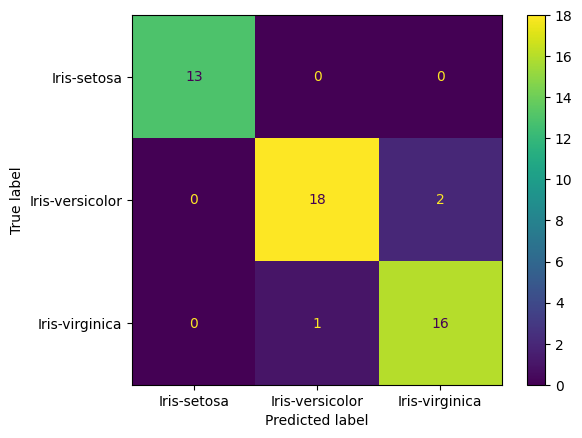

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test);

# cm = metrics.confusion_matrix(y_test, predictions_test, labels=svm_model.classes_)
# disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
# disp.plot();

In [5]:
import matplotlib.pyplot as plt 
from IPython.display import display, HTML
import os

#This code helps support alt text for student accessibility.
#This section and uses of 'plot_with_alt' are intended only for publishing to the webpage.
#Including alt text is good practice but not required for Task 2.    

# A function to support adding alt text to Python-generated images.
# Pandas, matplotlib, and others don't yet natively support alt ext. 
# The workflow is as follows: 
# 1. Create images
# 2. Recreate the same images using the function adding alt text.
# 3. Add metadata tags to 'remove-output' from (1) and input from (2)
   
def plot_with_alt_text(alt_text =''):
     i = 0 #filename counter
     outputName = 'output_plot'+str(i)+'.png'
     match = True
     while(match == True):
          if os.path.isfile(outputName):
               i = i+1
               outputName = 'output_plot'+str(i)+'.png'
          else: match = False
     plt.savefig(outputName)
     plt.savefig('../../_build/html/task2_c/example_sup_class/'+outputName)
     display(HTML(f'<img src="{outputName}" alt="{alt_text}">'), clear = True)
     plt.close()
          
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, colorbar=False);
plot_with_alt_text('A confusion matrix is shown.' \
     'The y-axis represents true labels with 3 rows from top to bottom: Iris-setosa, Iris-versicolor, and Iris-virginica.' \
     'The x-axis represents predicted labels with 3 columns from left to right: Iris-setosa, Iris-versicolor, and Iris-virginica.' \
     'The column for Iris-setosa has 13 in the Iris-setosa row and 0 in the other two rows.' \
     'The column for Iris-versicolor has row values of 0 for Iris-setosa, 18 for Iris-versicolor, and 1 for Iris-virginica.' \
     'The column for Iris-virginica has row values of 0 for Iris-setosa, 2 for Iris-versicolor, and 16 for Iris-virginica.' \
     )

94%, which still seems fairly good ([but what is "good" accuracy?](task2_part_c:application_performance)), but if selecting the test data randomly (try `random_state=42`), accuracy may *improve* on the test data because the set is relatively small and the model is fairly accurate. Using these results, the model can be further refined. However, continually tweaking parameters according to the test data results means we are back to studying from the answers, i.e., reintroducing the risk of overfitting. To deal with this, a *third set* can be withheld, called a “validation set," to analyze the final results. 

But Partitioning available data into three sets reduces the available data for training the model, making results more dependent on the random selection of training, testing, and validation sets. [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) addresses this issue by resampling the data. Again, this is optional but could be very useful, particularly for small data sets. 

In [6]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5, shuffle=True)
# The number of folds determines the test/train split for each iteration. 
# So 5 folds has 5 different mutually exclusive training sets. 
# That's a 1 to 4 (or .20 to .80) testing/training split for each of the 5 iterations.

scores = cross_val_score(svm_model, X, y)
# This shows the average score. Print 'scores' to see an array of individual iteration scores.
print("Average Score: ", scores.mean())

Average Score:  0.9666666666666666


### More testing and development 

Now we can further develop the model until our heart's content. Refine the model through a cyclic process guided by knowledge and experimentation. Research, try different algorithms, and adjust. They've built the libraries for this so that the additional coding effort will be lite. These steps are optional and not required, but this is where things become more exciting and challenging. 

Machine learning is a mix of art and science, requiring a balance of knowledge, intuition, and lots of *experimentation*. Research, play around, tweak, and constantly re-run code. 

### Logistic Regression

Logistic regression predicts the probability of something being in a category (hence its "regression" name). That probability indicates whether it's in that category, e.g., $.65 > .50 \Rightarrow \text{yes}$  (so it's also a classification method). We'll use [sklearn logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to do the latter.

```{margin} Logisitc regression or classification?
Really both, but most often, it's used for classification. Logistic regression uses input variables to predict the *probability* of an outcome, a number between 0.0 and 1.0 -hence "regression." However, using that probability to predict whether an outcome occurs (yes/no) is classification.     
```

In [7]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0).fit(X_train, y_train)

That's right, a new model in just two lines of code. This is typical if you stay within the same library. From here we can test, improve, and compare.

In [8]:
predictions_log = log_model.predict(X_test)
score = metrics.accuracy_score(y_test, predictions_log)
score

0.92

<!-- TODO 

### Support Vector Machine (SVM)

### Decision Tree

### Naive Bayes  -->